In [3]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 10})
cosmic_somatic_stat =pd.read_table("cosmic_somatic_gnomad.stat", header=None)

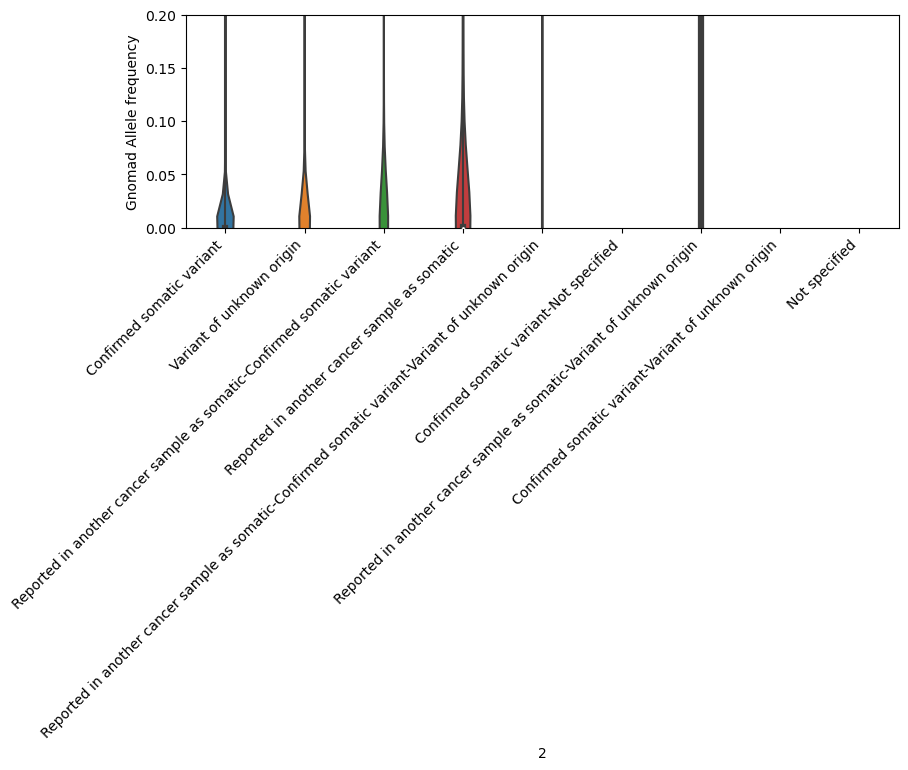

In [4]:
fig, ax = plt.subplots()
fig.set_size_inches(9.2, 5.6)
sns.violinplot(x=2, y=4, data=cosmic_somatic_stat, ax=ax)
ax.set_ylim(0, 0.2)
ax.set_ylabel("Gnomad Allele frequency")
fig.autofmt_xdate(rotation=45)
fig.subplots_adjust(bottom=0.5) #

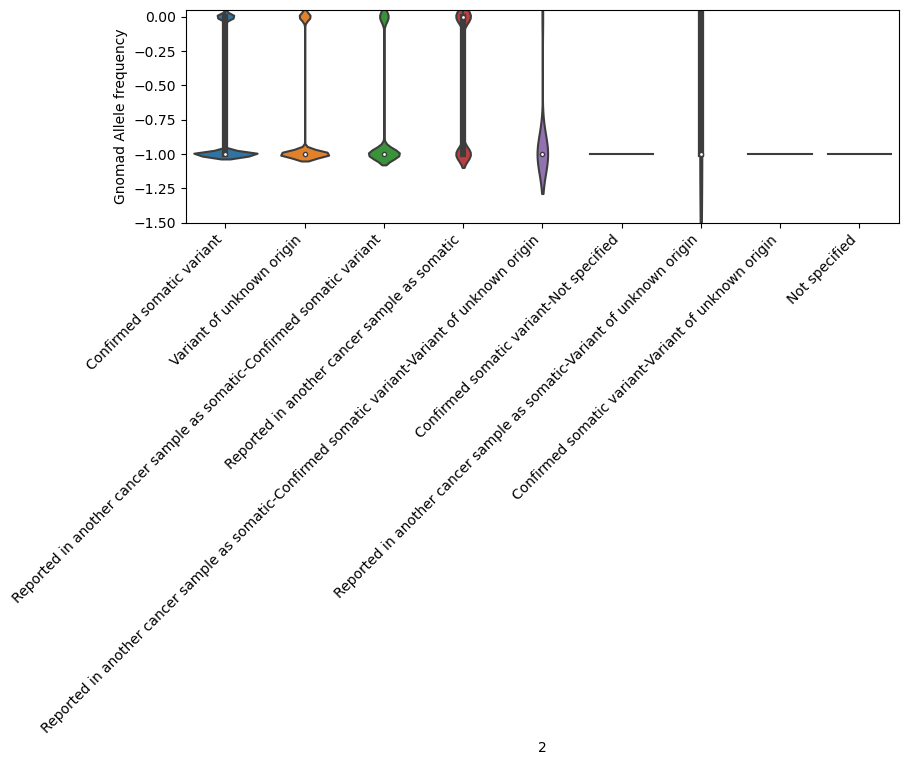

In [5]:
fig, ax = plt.subplots()
fig.set_size_inches(9.2, 5.6)
sns.violinplot(x=2, y=4, data=cosmic_somatic_stat, ax=ax)
ax.set_ylim(-1.5, 0.05)
ax.set_ylabel("Gnomad Allele frequency")
fig.autofmt_xdate(rotation=45)
fig.subplots_adjust(bottom=0.5) # or whatever

In [6]:
cosmic_somatic_stat.head()

,0,1,2,3,4
0,haematopoietic_and_lymphoid_tissue,1,Confirmed somatic variant,0.188714,0.288488
1,large_intestine,1,Confirmed somatic variant,-1.000000,-1.000000
2,skin,1,Confirmed somatic variant,0.008329,0.011631
3,prostate,1,Confirmed somatic variant,0.000020,0.000065
4,pancreas,1,Confirmed somatic variant,0.000861,0.001958


In [8]:
indexes = []
somatic_prop = []

In [9]:
for cutoff in [0.05, 1e-2, 1e-2, 1e-4, 1e-5]:
    select_som = pd.crosstab(cosmic_somatic_stat.loc[:, 2], 
                             cosmic_somatic_stat.loc[:, 4] < cutoff).loc["Confirmed somatic variant", :]
    print(select_som[1] / select_som.sum())
    indexes.append(cutoff)
    somatic_prop.append(select_som[1] / select_som.sum())

0.9577714349684544
0.9450845452175753
0.9450845452175753
0.8385475202711592
0.7416988959643989


In [14]:
pd.DataFrame(somatic_prop, index=indexes)

,0
0.05000,0.957771
0.01000,0.945085
0.01000,0.945085
0.00010,0.838548
0.00001,0.741699


<Axes: >

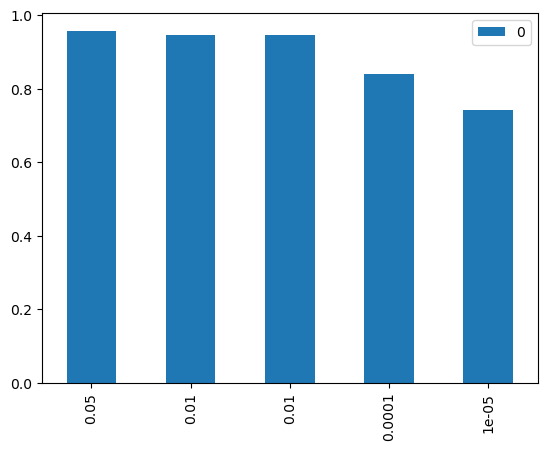

In [15]:
pd.DataFrame(somatic_prop, index=indexes).plot.bar()

<Axes: xlabel='2'>

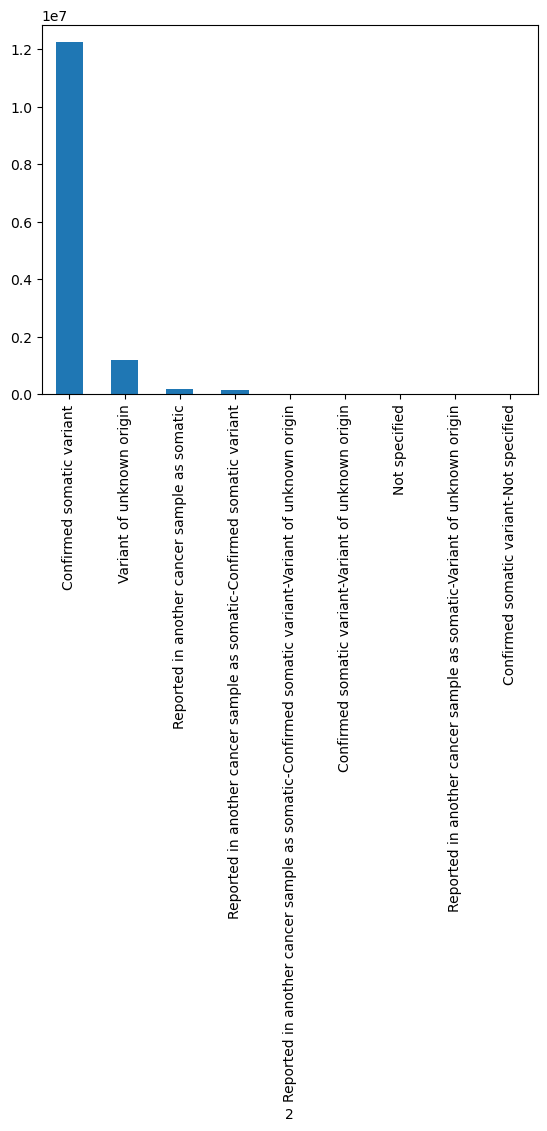

In [17]:
cosmic_somatic_stat.value_counts(2).plot.bar()